In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startupexpansion/startup-expansion.xlsx


**read data**

In [2]:
df=pd.read_excel('/kaggle/input/startupexpansion/startup-expansion.xlsx')
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


**Exploring data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


**statistical information about data**

In [4]:
df[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


* the highest marketing spend was 3984 and high revenue was 68828

* the lowest marketing spend was 1811 and the lowest revenue was 15562

* the mean of marketing spend was at range of 2893 and the mean of revenue at range of 39300

In [5]:
df.describe(include=object)

,City,State,Sales Region,New Expansion
count,150,150,150,150
unique,149,35,2,2
top,Rochester,California,Region 2,Old
freq,2,40,86,140


* there was a 35 state contain  149 city 

* california is the most duplicated state 

* Rochester is the only city was repeated twice in the data 

* there was a 140 old store in the data , which we can deduce that there was only 10 new stores in the data .

* the most sales was at region2  .

**data exploration**

In [6]:
df['State'].sample(15)

27            Utah
149     California
103          Texas
77     Connecticut
125        Georgia
50            Ohio
145     New Jersey
39         Florida
115     New Jersey
84        Colorado
131           Utah
17      California
25         Florida
73       Tennessee
120       Michigan
Name: State, dtype: object

In [7]:
df[df['State']=='California']

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
7,8,Antioch,California,Region 2,Old,2593,19569
10,11,Rialto,California,Region 2,Old,2541,16860
11,12,Santa Maria,California,Region 2,Old,2651,21988
15,16,Temecula,California,Region 2,Old,2795,16690
17,18,Fontana,California,Region 2,Old,3085,63027
20,21,Concord,California,Region 2,Old,2521,38178
21,22,Modesto,California,Region 2,Old,3077,56836
23,24,Burbank,California,Region 2,Old,3679,20123
24,25,Elk Grove,California,Region 2,Old,2918,49856
36,37,Inglewood,California,Region 2,Old,2904,20455


In [8]:
df[df['State']=='Texas'].value_counts()

Store ID  City             State  Sales Region  New Expansion  Marketing Spend  Revenue
2         Midland          Texas  Region 2      Old            2727             45689      1
91        Mesquite         Texas  Region 2      Old            3072             40779      1
147       Brownsville      Texas  Region 2      New            3675             63148      1
115       McAllen          Texas  Region 2      Old            2282             43924      1
110       Grand Prairie    Texas  Region 2      Old            3131             50895      1
106       Richardson       Texas  Region 2      Old            3228             22824      1
104       Killeen          Texas  Region 2      Old            2962             43773      1
97        Wichita Falls    Texas  Region 2      Old            2846             15735      1
87        Amarillo         Texas  Region 2      Old            3984             56089      1
4         Denton           Texas  Region 2      Old            2759        

In [9]:
df['State'].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

In [10]:
df['City'].value_counts()

City
Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: count, Length: 149, dtype: int64

In [11]:
#old expansion cities

df[df['New Expansion']=='Old'].value_counts('City')

City
Rochester          2
Akron              1
Richardson         1
Pompano Beach      1
Port St. Lucie     1
                  ..
Gainesville        1
Fullerton          1
Fort Lauderdale    1
Fontana            1
Yonkers            1
Name: count, Length: 139, dtype: int64

In [12]:
# new expansion cities

df[df['New Expansion']=='New'].value_counts('City')

City
Brownsville         1
Chattanooga         1
College Station     1
Glendale            1
Joliet              1
Paterson            1
Rancho Cucamonga    1
Rockford            1
Tempe               1
Thousand Oaks       1
Name: count, dtype: int64

<Axes: xlabel='New Expansion'>

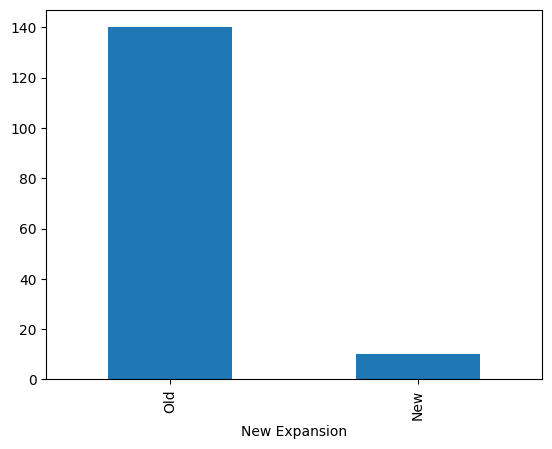

In [13]:
df['New Expansion'].value_counts(ascending=False).plot(kind='bar')

In [14]:
df.groupby('New Expansion').groups

{'New': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 'Old': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}

In [15]:
df['Sales Region'].value_counts()

Sales Region
Region 2    86
Region 1    64
Name: count, dtype: int64

<Axes: ylabel='count'>

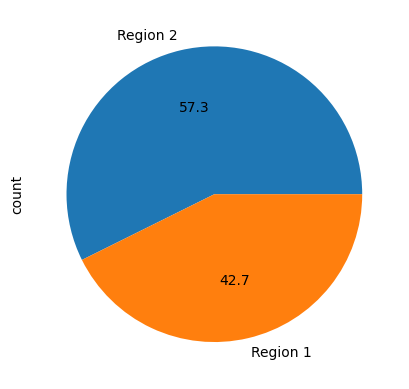

In [16]:
df['Sales Region'].value_counts().plot(kind='pie',autopct='%1.1f')

In [17]:
df.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue'],
      dtype='object')

Text(0, 0.5, 'marketing spend')

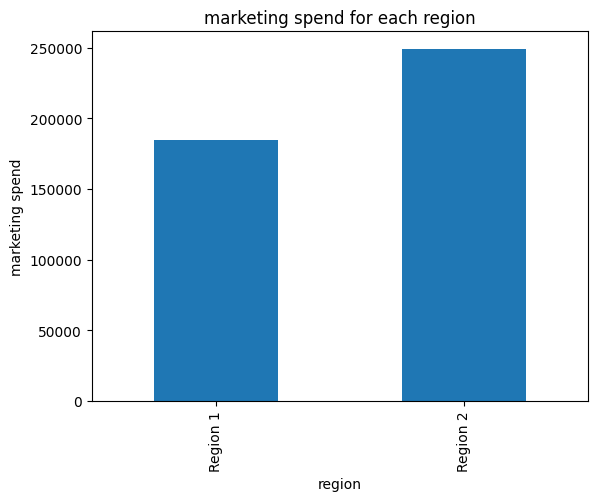

In [37]:
#marketing spend for each region

df.groupby('Sales Region')['Marketing Spend'].sum().plot(kind='bar')
plt.title('marketing spend for each region')
plt.xlabel('region')
plt.ylabel('marketing spend')


* region 1 made marketing spent less than region two , thus is the normal as region 2 is bigger than one  

<Axes: xlabel='New Expansion'>

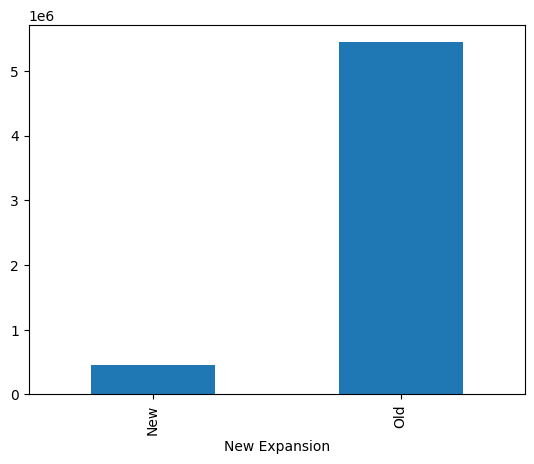

In [19]:
#relation between new expansion and revenue

df.groupby('New Expansion')['Revenue'].sum().plot(kind='bar')

**relation between revenue and city**

* top ten revenues in old cities


In [20]:
df[df['New Expansion']=='Old'].groupby(['City','State']).max()['Revenue'].nlargest(10)

City            State        
Little Rock     Arkansas         68828
Grand Rapids    Michigan         65475
Rochester       New York         64906
Oxnard          California       64302
Fontana         California       63027
Providence      Rhode Island     62337
Birmingham      Alabama          60338
Overland Park   Kansas           59887
San Bernardino  California       59870
Worcester       Massachusetts    59840
Name: Revenue, dtype: int64

* the highest revenue (68828 ) at old stores is at the Little Rock city  at Arkansas state

Text(0, 0.5, 'reveue')

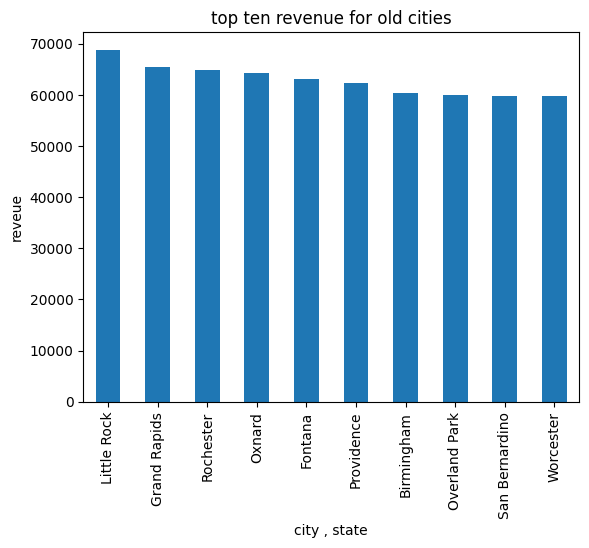

In [21]:
df[df['New Expansion']=='Old'].groupby('City').max()['Revenue'].nlargest(10).plot(kind='bar')
plt.title('top ten revenue for old cities')
plt.xlabel('city , state')
plt.ylabel('reveue')

**max revenue in new cities**

In [22]:
df[df['New Expansion']=='New'].groupby(['City','State']).max()['Revenue'].nlargest(10)

City              State     
Brownsville       Texas         63148
Chattanooga       Tennessee     55357
Rancho Cucamonga  California    52366
Glendale          California    49376
Tempe             Arizona       48954
Joliet            Illinois      48315
Rockford          Illinois      43377
Thousand Oaks     California    40141
Paterson          New Jersey    34603
College Station   Texas         22457
Name: Revenue, dtype: int64

Text(0, 0.5, 'reveue')

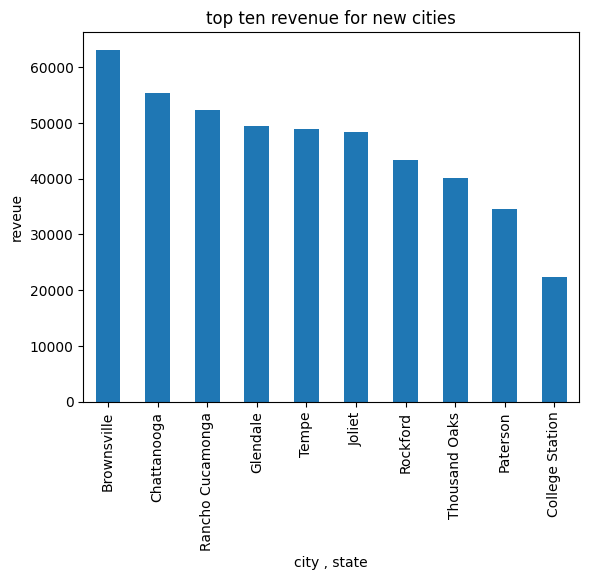

In [23]:
df[df['New Expansion']=='New'].groupby('City').max()['Revenue'].nlargest(10).plot(kind='bar')
plt.title('top ten revenue for new cities')
plt.xlabel('city , state')
plt.ylabel('reveue')

* Brownsville  at Texas state has the largest revenue (63148 )  in new stores

**Top 10 Revenue for each OLD stores**

In [25]:
df[df['New Expansion']=='Old'].groupby('State').sum()['Revenue'].nlargest(10)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

* California state had the most revnue (as it was the most repeated state)
  and Texas state was the second 

**revenue for new stores**

In [26]:
df[df['New Expansion']=='New'].groupby('State').sum()['Revenue'].nlargest()

State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
Name: Revenue, dtype: int64

* Also at new stores , california state takes the first place , followed by a new state(Illinois) and texas state .

**max and minimum marketing spend**

In [27]:
# top ten max marketing spend
df[df['New Expansion']=='New'].groupby(['City','State']).max()['Marketing Spend'].nlargest(10)

City              State     
Brownsville       Texas         3675
Chattanooga       Tennessee     3587
Joliet            Illinois      3279
College Station   Texas         2994
Rancho Cucamonga  California    2945
Tempe             Arizona       2911
Rockford          Illinois      2648
Thousand Oaks     California    2431
Glendale          California    2363
Paterson          New Jersey    2251
Name: Marketing Spend, dtype: int64

* Brownsville city at texas state had the most marketing spend in new stores

Text(0, 0.5, 'marketing spend')

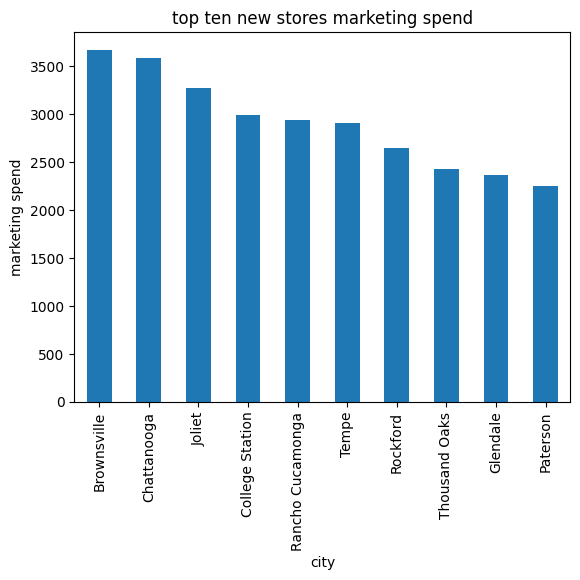

In [28]:
df[df['New Expansion']=='New'].groupby('City').max()['Marketing Spend'].nlargest(10).plot(kind='bar')
plt.title('top ten new stores marketing spend')
plt.xlabel('city')
plt.ylabel('marketing spend')

In [29]:
df[df['New Expansion']=='Old'].groupby(['City','State']).max()['Marketing Spend'].nlargest(10)

City            State      
Amarillo        Texas          3984
Richmond        California     3924
Centennial      Colorado       3697
Burbank         California     3679
Salt Lake City  Utah           3620
Green Bay       Wisconsin      3586
Moreno Valley   California     3507
Miramar         Florida        3488
Jackson         Mississippi    3466
San Bernardino  California     3399
Name: Marketing Spend, dtype: int64

* Amarillo city was the first in marketing spend 

In [30]:
#the most revenue
df.nlargest(2,columns='Revenue')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475


In [31]:
# the smallest revenue

df.nsmallest(2,columns='Revenue')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
53,54,Everett,Washington,Region 2,Old,3129,15562
96,97,Wichita Falls,Texas,Region 2,Old,2846,15735


**feature engineering**

In [32]:
# make new column for profit
df['Profit']=df['Revenue']-df['Marketing Spend']

In [33]:
#create new column for return of marketing spend
df['roms']=round((df['Profit']/df['Marketing Spend'])*100 ,2)

In [34]:
#create new column for percentage  return of marketing spend
df['roms%']=round(df['roms']/100 ,2)
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,roms,roms%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.69
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.75
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.90
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.88
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.87


In [35]:
# save the data 
df.to_csv('startup expansion modified.csv')


**top ten profit at california state**

In [39]:
# top 10 profit at california state
df[df['State']=='California'].groupby('City').max()['Profit'].nlargest(10)

City
Oxnard              61984
Fontana             59942
San Bernardino      56471
Santa Rosa          55993
Moreno Valley       55747
Garden Grove        54245
Modesto             53759
Oceanside           52600
Huntington Beach    51618
Rancho Cucamonga    49421
Name: Profit, dtype: int64

**the highest profit and lowest marketing spend**

In [40]:
#the highest profit
df.nlargest(1,columns='Profit')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,roms,roms%
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388,2720.82,27.21


In [42]:
#the lowest spend
df.nsmallest(1,columns='Marketing Spend')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,roms,roms%
135,136,San Mateo,California,Region 2,Old,1811,19426,17615,972.67,9.73


In [43]:
#the lowest profit
df.nsmallest(1,columns='Profit')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,roms,roms%
53,54,Everett,Washington,Region 2,Old,3129,15562,12433,397.35,3.97


In [59]:
#the highest spend
df.nlargest(1,columns='Marketing Spend')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,roms,roms%
86,87,Amarillo,Texas,Region 2,Old,3984,56089,52105,1307.86,13.08


**the total profit by sales regions**

In [44]:
df.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue', 'Profit', 'roms', 'roms%'],
      dtype='object')

In [48]:
df.groupby('Sales Region').sum()['Profit']

Sales Region
Region 1    2411405
Region 2    3049838
Name: Profit, dtype: int64

* profit in region 2 is more than region 1 

**total profit by new expansion**

In [52]:
df.groupby('New Expansion').sum()['Profit'].nlargest()

New Expansion
Old    5032233
New     429010
Name: Profit, dtype: int64

* total profit in old stores(140 stores) was 5032233 which means that each store has a net profit 35944  

* total profit in new stores ( 10 stores) was 429010 which mweans that each store has a net profit 42902 

**this means that the new stores earned more profit (about 7000) than the old .**

  which means that the expansion in new stores with the same possibilities as the new one or development will be better than the expansion in old 

**does the net profit affected by marketing spend?**

Text(0.5, 1.0, 'marketing spend vs profit')

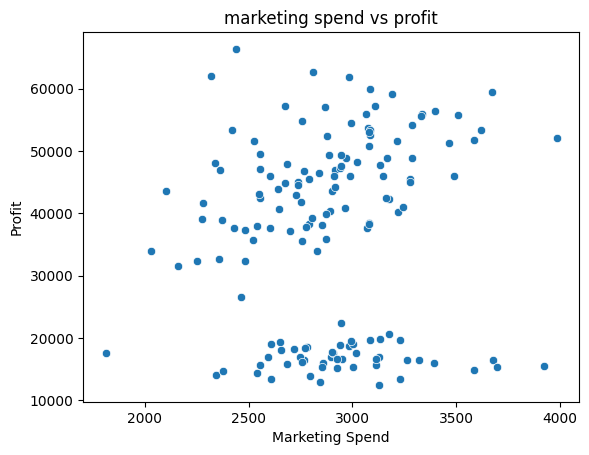

In [54]:
sns.scatterplot(data=df,x='Marketing Spend',y='Profit')
plt.title('marketing spend vs profit')

* we can deduce that increase of marketing spend doesn’t mean the increase in profit 

**Conclusion**

* we have 149 city in 35 states 
* there was 140 old store and 10 new stores
* total profit in old stores(140 stores) was 5032233 which means that each store has a net profit 35944

* total profit in new stores ( 10 stores) was 429010 which mweans that each store has a net profit 42902

this means that the new stores earned more profit (about 7000) than the old.


* San Mateo city was the lowest in marketing spend. 
* the highest profit  was in Little Rock city in Arkansas state and it was 66388.
* the lowest profit was in Everett city in Washington state and it was 12433.
* the highest marketing spend was( 3984)in Amarillo city in Texas state ,although it doesn’t made the highest profit which means that the high spend doesn’t equal the high profit. 

*  the expansion in new stores with the same possibilities as the new one or development will be better than the expansion in old .

*  at new stores , california state takes the first place , followed by a new state(Illinois) and texas state.



**i’m happy with your comment and your upvote**

**thank you**